In [1]:
import pandas as pd

In [2]:
import geopandas

In [3]:
from pysal.lib import weights

In [4]:
from pysal.explore import esda

C:\anaconda\envs\ACV01\Lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
C:\anaconda\envs\ACV01\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
# import mapclassify

In [8]:
from functools import reduce

In [9]:
from pysal.model import spreg

In [10]:
# pip install contextily

In [11]:
import contextily

In [12]:
# from decimal import Decimal

In [13]:
import statsmodels.formula.api as sm

### Loading variables files

In [14]:
shape = geopandas.read_file('Analysis_files\London_MSOA.shp')

In [15]:
shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MSOA21CD  1002 non-null   object  
 1   MSOA21NM  1002 non-null   object  
 2   BNG_E     1002 non-null   int64   
 3   BNG_N     1002 non-null   int64   
 4   LONG      1002 non-null   float64 
 5   LAT       1002 non-null   float64 
 6   GlobalID  1002 non-null   object  
 7   geometry  1002 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 62.8+ KB


In [16]:
# Crimes reported as logartithm of rates
crimes = pd.read_csv('Analysis_files/dcrl.csv')

In [17]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MSOA21CD   1002 non-null   object 
 1   MSOA21NM   1002 non-null   object 
 2   Log10-tot  1002 non-null   float64
 3   Log10-VSO  1002 non-null   float64
 4   Log10-ASB  1002 non-null   float64
 5   Log10-Bur  1002 non-null   float64
dtypes: float64(4), object(2)
memory usage: 47.1+ KB


In [18]:
# Deprivation variables as rates (from total dwellings)
deprivation = pd.read_csv('Analysis_files/deprivation-rates.csv')

In [19]:
vacant = pd.read_csv('Analysis_files/vacants.csv')

In [20]:
datp = pd.read_csv('Analysis_files/accommodation-rates.csv')

In [21]:
tenure2 = pd.read_csv('Analysis_files/tenuregroups-rates.csv')

In [22]:
# average house price per square metre on each MSOA, and its logarithm
hpsm = pd.read_csv('Analysis_files/hpsm.csv')

In [23]:
hpsm.rename(columns={'msoa21cd':'MSOA21CD'}, inplace= True)

In [24]:
hpsml = hpsm[['MSOA21CD','Log10-price']]

In [25]:
dc08 = pd.read_csv('Analysis_files/dc08.csv')

# Merging geography with variables

In [26]:
# datasets of variables in rates and logarithms, no clusters

dfs = [crimes, deprivation, vacant, datp, tenure2, hpsml]

In [27]:
variables = reduce(lambda  left,right: pd.merge(left,right,on=['MSOA21CD'],
                                            how='outer'), dfs)

In [28]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA21CD        1002 non-null   object 
 1   MSOA21NM        1002 non-null   object 
 2   Log10-tot       1002 non-null   float64
 3   Log10-VSO       1002 non-null   float64
 4   Log10-ASB       1002 non-null   float64
 5   Log10-Bur       1002 non-null   float64
 6   %_not deprived  1002 non-null   float64
 7   %_deprived-1    1002 non-null   float64
 8   %_deprived-2    1002 non-null   float64
 9   %_deprived-3    1002 non-null   float64
 10  %_deprived-4    1002 non-null   float64
 11  Empty %         1002 non-null   float64
 12  %_Houses        1002 non-null   float64
 13  %_Flats         1002 non-null   float64
 14  %_Other         1002 non-null   float64
 15  %_Owned         1002 non-null   float64
 16  %_Social-rent   1002 non-null   float64
 17  %_Private-rent  1002 non-null   f

In [29]:
variables.head()

MSOA21CD                  MSOA21NM  Log10-tot  Log10-VSO  Log10-ASB  \
0  E02000001        City of London 001   2.857743   2.072601   2.063628   
1  E02000002  Barking and Dagenham 001   1.996037   1.492455   1.399701   
2  E02000003  Barking and Dagenham 002   2.023418   1.425950   1.461036   
3  E02000004  Barking and Dagenham 003   1.761781   1.362728   1.050417   
4  E02000005  Barking and Dagenham 004   1.988874   1.385605   1.419745   

   Log10-Bur  %_not deprived  %_deprived-1  %_deprived-2  %_deprived-3  \
0   1.416344       40.106514     21.125222      4.738495      1.024170   
1   1.061510       32.328024     36.767198     20.772619      6.574043   
2   1.243385       40.111895     35.684748     16.224763      3.527122   
3   0.852415       42.462312     34.715243     15.284757      4.103853   
4   1.243318       40.965773     33.218360     16.449987      5.332980   

   %_deprived-4    Empty %   %_Houses    %_Flats   %_Other    %_Owned  \
0      0.109245  32.896354   1.365561  58.350403  7.387683  24.498156   
1      0.813284   2.744832  58.386987  37.241613  1.626567  41.884107   
2      0.048650   4.402822  64.558502  24.276332  6.738020  53.174410   
3      0.125628   3.308208  83.040201  11.264657  2.386935  64.614740   
4      0.344919   3.741045  82.647917   9.763863  3.847174  49.933669   

   %_Social-rent  %_Private-rent  Log10-price  
0       9.968592       32.404752     4.091751  
1      40.630295       14.130803     3.640018  
2      12.697640       29.117003     3.636683  
3      15.619765       15.745394     3.671740  
4      24.197400       20.668612     3.660133

<Axes: >

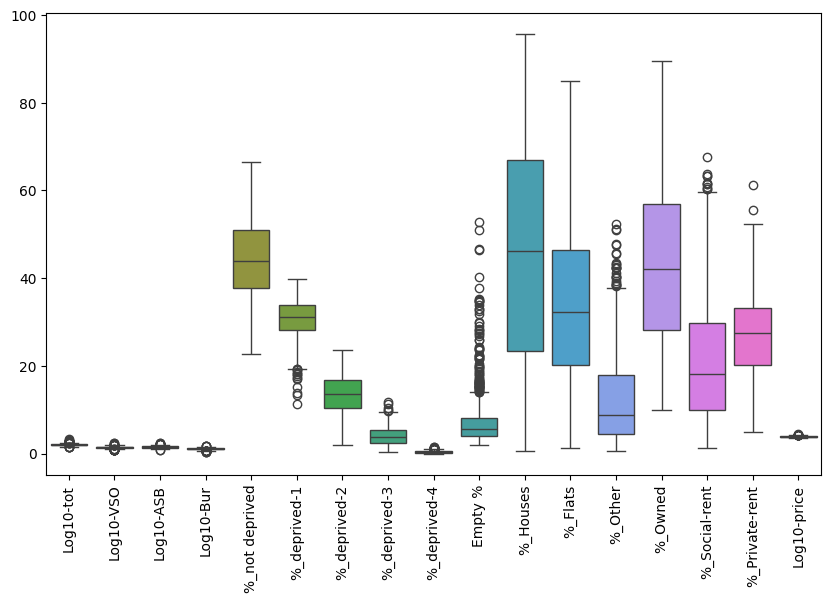

In [30]:
fig, axes = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
sns.boxplot(variables)

In [31]:
gdf1 = geopandas.GeoDataFrame(shape.merge(variables, on= 'MSOA21CD'), crs= shape.crs).to_crs(epsg=3857)
gdf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSOA21CD        1002 non-null   object  
 1   MSOA21NM_x      1002 non-null   object  
 2   BNG_E           1002 non-null   int64   
 3   BNG_N           1002 non-null   int64   
 4   LONG            1002 non-null   float64 
 5   LAT             1002 non-null   float64 
 6   GlobalID        1002 non-null   object  
 7   geometry        1002 non-null   geometry
 8   MSOA21NM_y      1002 non-null   object  
 9   Log10-tot       1002 non-null   float64 
 10  Log10-VSO       1002 non-null   float64 
 11  Log10-ASB       1002 non-null   float64 
 12  Log10-Bur       1002 non-null   float64 
 13  %_not deprived  1002 non-null   float64 
 14  %_deprived-1    1002 non-null   float64 
 15  %_deprived-2    1002 non-null   float64 
 16  %_deprived-3    1002 non-null   float64 
 17  %_depr

In [32]:
print(gdf1.columns.values)

['MSOA21CD' 'MSOA21NM_x' 'BNG_E' 'BNG_N' 'LONG' 'LAT' 'GlobalID'
 'geometry' 'MSOA21NM_y' 'Log10-tot' 'Log10-VSO' 'Log10-ASB' 'Log10-Bur'
 '%_not deprived' '%_deprived-1' '%_deprived-2' '%_deprived-3'
 '%_deprived-4' 'Empty %' '%_Houses' '%_Flats' '%_Other' '%_Owned'
 '%_Social-rent' '%_Private-rent' 'Log10-price']


In [33]:
# new gdf dropping some cols

gdf2 = gdf1.drop(['BNG_E','BNG_N','LONG','LAT','GlobalID','MSOA21NM_y'], axis= 1)

In [34]:
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSOA21CD        1002 non-null   object  
 1   MSOA21NM_x      1002 non-null   object  
 2   geometry        1002 non-null   geometry
 3   Log10-tot       1002 non-null   float64 
 4   Log10-VSO       1002 non-null   float64 
 5   Log10-ASB       1002 non-null   float64 
 6   Log10-Bur       1002 non-null   float64 
 7   %_not deprived  1002 non-null   float64 
 8   %_deprived-1    1002 non-null   float64 
 9   %_deprived-2    1002 non-null   float64 
 10  %_deprived-3    1002 non-null   float64 
 11  %_deprived-4    1002 non-null   float64 
 12  Empty %         1002 non-null   float64 
 13  %_Houses        1002 non-null   float64 
 14  %_Flats         1002 non-null   float64 
 15  %_Other         1002 non-null   float64 
 16  %_Owned         1002 non-null   float64 
 17  %_Soci

## Global spatial autocorrelation

We know that these variables are not spread randomly in the city so I'll check the global spatial autocorrelation of each variable, as an easy measure

In [35]:
wq = weights.contiguity.Queen.from_dataframe(gdf2)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_16064\2670610107.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = weights.contiguity.Queen.from_dataframe(gdf2)


In [36]:
wq.transform = "R"

In [37]:
vars = list(gdf2.columns.values[3:20])

In [38]:
print(vars)

['Log10-tot', 'Log10-VSO', 'Log10-ASB', 'Log10-Bur', '%_not deprived', '%_deprived-1', '%_deprived-2', '%_deprived-3', '%_deprived-4', 'Empty %', '%_Houses', '%_Flats', '%_Other', '%_Owned', '%_Social-rent', '%_Private-rent', 'Log10-price']


In [39]:
for v in vars:
    moran = esda.moran.Moran(gdf2[v], wq)
    print(f"{v}:\t\tMoran's I= {moran.I}, \tp-value= {moran.p_sim}")

Log10-tot:		Moran's I= 0.46874777572756715, 	p-value= 0.001
Log10-VSO:		Moran's I= 0.3754086126490355, 	p-value= 0.001
Log10-ASB:		Moran's I= 0.49438927626948737, 	p-value= 0.001
Log10-Bur:		Moran's I= 0.4015636778021994, 	p-value= 0.001
%_not deprived:		Moran's I= 0.6203487808422034, 	p-value= 0.001
%_deprived-1:		Moran's I= 0.7145934273057416, 	p-value= 0.001
%_deprived-2:		Moran's I= 0.569702831131489, 	p-value= 0.001
%_deprived-3:		Moran's I= 0.5022561093709396, 	p-value= 0.001
%_deprived-4:		Moran's I= 0.3717531192960595, 	p-value= 0.001
Empty %:		Moran's I= 0.7832157727190324, 	p-value= 0.001
%_Houses:		Moran's I= 0.7414163773095125, 	p-value= 0.001
%_Flats:		Moran's I= 0.5481633737293258, 	p-value= 0.001
%_Other:		Moran's I= 0.6098993783788154, 	p-value= 0.001
%_Owned:		Moran's I= 0.7356824500007737, 	p-value= 0.001
%_Social-rent:		Moran's I= 0.49299299467424096, 	p-value= 0.001
%_Private-rent:		Moran's I= 0.5587328774446914, 	p-value= 0.001
Log10-price:		Moran's I= 0.8865705955

Here we just know that, values closer to 0 means the values are randomly arrange, values closer to 1 means that the values of that variable are positively spatially autocorrelated. The 'Log10-price' is the variable showing greater autocorrelation (Moran's I= 0.88657), and '%_deprived-4' shows the lowest Moran's I (0.37175) although it is significant enough to say that variable is also autocorrelated.
With this, we don't know if the concentration of values follow the same pattern in all variables, or if it is related between variables somehow.

## GSA variables encoded

In [40]:
gdf3 = geopandas.GeoDataFrame(shape.merge(dc08, on= 'MSOA21CD'), crs= shape.crs).to_crs(epsg=3857)
gdf3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSOA21CD             1002 non-null   object  
 1   MSOA21NM_x           1002 non-null   object  
 2   BNG_E                1002 non-null   int64   
 3   BNG_N                1002 non-null   int64   
 4   LONG                 1002 non-null   float64 
 5   LAT                  1002 non-null   float64 
 6   GlobalID             1002 non-null   object  
 7   geometry             1002 non-null   geometry
 8   MSOA21NM_y           1002 non-null   object  
 9   Log10-tot            1002 non-null   float64 
 10  Log10-VSO            1002 non-null   float64 
 11  Log10-ASB            1002 non-null   float64 
 12  Log10-Bur            1002 non-null   float64 
 13  Mixed tenures        1002 non-null   float64 
 14  Owned & Private      1002 non-null   float64 
 15  More private 

In [41]:
# new gdf dropping some cols

gdf4 = gdf3.drop(['BNG_E','BNG_N','LONG','LAT','GlobalID','MSOA21NM_y'], axis= 1)

In [42]:
gdf4.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSOA21CD             1002 non-null   object  
 1   MSOA21NM_x           1002 non-null   object  
 2   geometry             1002 non-null   geometry
 3   Log10-tot            1002 non-null   float64 
 4   Log10-VSO            1002 non-null   float64 
 5   Log10-ASB            1002 non-null   float64 
 6   Log10-Bur            1002 non-null   float64 
 7   Mixed tenures        1002 non-null   float64 
 8   Owned & Private      1002 non-null   float64 
 9   More private rent    1002 non-null   float64 
 10  More owned           1002 non-null   float64 
 11  More social rent     1002 non-null   float64 
 12  Log10-vac            1002 non-null   float64 
 13  Most deprived        1002 non-null   float64 
 14  Mixed extremes       1002 non-null   float64 
 15  Mixed less de

In [43]:
wq = weights.contiguity.Queen.from_dataframe(gdf4)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_16064\3120855493.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = weights.contiguity.Queen.from_dataframe(gdf4)


In [44]:
wq.transform = "R"

In [45]:
vars2 = list(gdf4.columns.values[3:22])
print(vars2)

['Log10-tot', 'Log10-VSO', 'Log10-ASB', 'Log10-Bur', 'Mixed tenures', 'Owned & Private', 'More private rent', 'More owned', 'More social rent', 'Log10-vac', 'Most deprived', 'Mixed extremes', 'Mixed less deprived', 'Mixed most deprived', 'Less deprived', 'Mainly flats', 'Mainly houses', 'Mixed types', 'Log10-price']


In [46]:
for v in vars2:
    moran = esda.moran.Moran(gdf4[v], wq)
    print(f"{v}:\t\tMoran's I= {moran.I}, \tp-value= {moran.p_sim}")

Log10-tot:		Moran's I= 0.4687477757275671, 	p-value= 0.001
Log10-VSO:		Moran's I= 0.3754086126490355, 	p-value= 0.001
Log10-ASB:		Moran's I= 0.4943892762694874, 	p-value= 0.001
Log10-Bur:		Moran's I= 0.4015636778021994, 	p-value= 0.001
Mixed tenures:		Moran's I= 0.3786699320728461, 	p-value= 0.001
Owned & Private:		Moran's I= 0.22987860931717488, 	p-value= 0.001
More private rent:		Moran's I= 0.27557566898159763, 	p-value= 0.001
More owned:		Moran's I= 0.4679264480763515, 	p-value= 0.001
More social rent:		Moran's I= 0.15695599867859375, 	p-value= 0.001
Log10-vac:		Moran's I= 0.7162658405182247, 	p-value= 0.001
Most deprived:		Moran's I= 0.4223327874477807, 	p-value= 0.001
Mixed extremes:		Moran's I= 0.6148551984896524, 	p-value= 0.001
Mixed less deprived:		Moran's I= 0.15322445914744565, 	p-value= 0.001
Mixed most deprived:		Moran's I= 0.16447258920313787, 	p-value= 0.001
Less deprived:		Moran's I= 0.37765269621976927, 	p-value= 0.001
Mainly flats:		Moran's I= 0.5050607673434552, 	p-v

Again the 'Log10-price' is the variable showing greater autocorrelation (it's the same) 
Looking in the groups of variables, it is more useful to compare the Moran's I between the variables as rates and encoded.

# Errors of OLS with neighbours

First the variables as rates

In [47]:
# Another spatial matrix with only the closest value to each

knn = weights.KNN.from_dataframe(gdf2, k=1)

C:\anaconda\envs\ACV01\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 265 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [48]:
vars07 = ['%_not deprived', '%_deprived-1', '%_deprived-2', '%_deprived-3', '%_deprived-4', '%_Owned', 
          '%_Social-rent', '%_Private-rent', 'Log10-price', 'Empty %', '%_Houses', '%_Flats', '%_Other']

In [49]:
# OLS model for total crime as target

m14 = spreg.OLS(
    # Dependent variable
    gdf2[["Log10-tot"]].values,
    # Independent variables
    gdf2[vars07].values,
    # Dependent variable name
    name_y="Log10-tot",
    # Independent variable name
    name_x=vars07)

In [50]:
m15 = spreg.OLS(gdf2[["Log10-VSO"]].values, gdf2[vars07].values, 
                name_y="Log10-VSO", name_x=vars07)

In [51]:
m16 = spreg.OLS(gdf2[["Log10-ASB"]].values, gdf2[vars07].values,
                name_y="Log10-ASB", name_x=vars07)

In [52]:
m17 = spreg.OLS(gdf2[["Log10-Bur"]].values, gdf2[vars07].values,
                name_y="Log10-Bur", name_x=vars07)

In [53]:
# Checking the residuals of the last regression with these variables, for total crime 

lag_residual = weights.spatial_lag.lag_spatial(knn, m14.u)

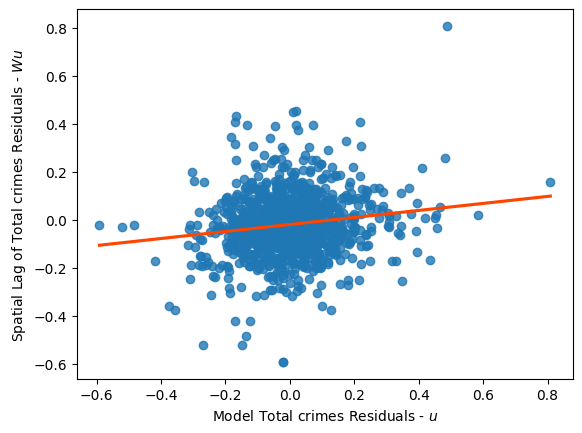

In [54]:
ax = sns.regplot(
    x=m14.u.flatten(),
    y=lag_residual.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Model Total crimes Residuals - $u$")
ax.set_ylabel("Spatial Lag of Total crimes Residuals - $W u$");

In [55]:
# Checking the residuals of the last regression with these variables, for VSO 

lag_residual2 = weights.spatial_lag.lag_spatial(knn, m15.u)

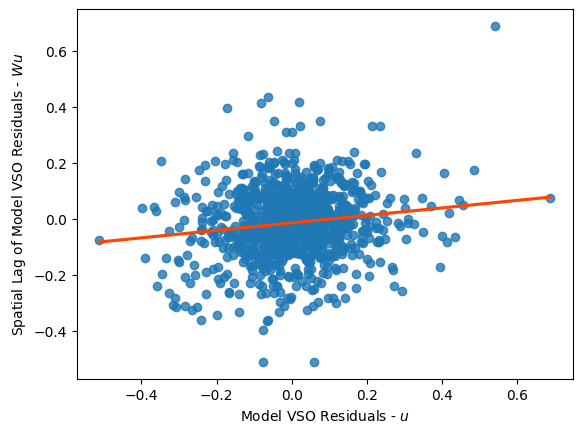

In [56]:
ax = sns.regplot(
    x=m15.u.flatten(),
    y=lag_residual2.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Model VSO Residuals - $u$")
ax.set_ylabel("Spatial Lag of Model VSO Residuals - $W u$");

In [57]:
# Checking the residuals of the last regression with these variables, for ASB 

lag_residual3 = weights.spatial_lag.lag_spatial(knn, m16.u)

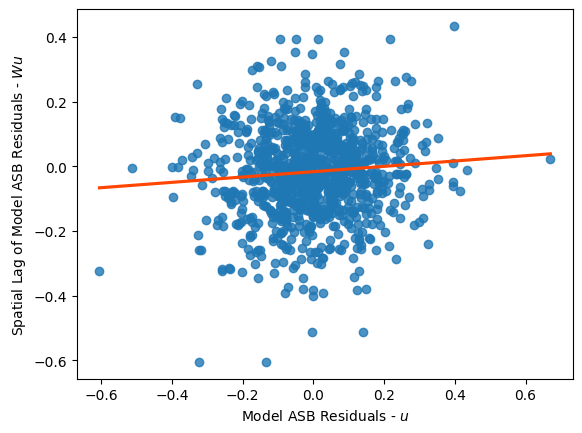

In [58]:
ax = sns.regplot(
    x=m16.u.flatten(),
    y=lag_residual3.flatten(),
    line_kws=dict(color="orangered"),
    ci=None)
ax.set_xlabel("Model ASB Residuals - $u$")
ax.set_ylabel("Spatial Lag of Model ASB Residuals - $W u$");

In [59]:
# Checking the residuals of the last regression with these variables, for burglaries 

lag_residual4 = weights.spatial_lag.lag_spatial(knn, m17.u)

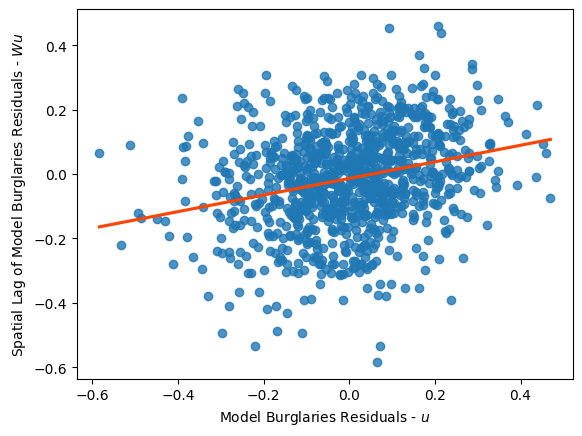

In [60]:
ax = sns.regplot(
    x=m17.u.flatten(),
    y=lag_residual4.flatten(),
    line_kws=dict(color="orangered"),
    ci=None)
ax.set_xlabel("Model Burglaries Residuals - $u$")
ax.set_ylabel("Spatial Lag of Model Burglaries Residuals - $W u$");

Prediction error at each site and the prediction error at the site nearest to it

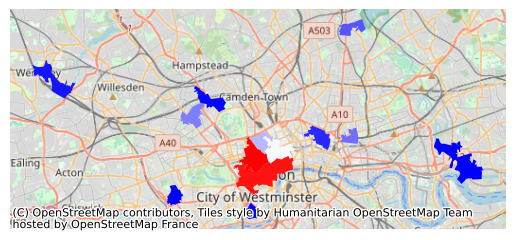

In [61]:
# Re-weight W matrix to 6 nearest neighbors
knn.reweight(k=6, inplace=True)
# Row standardize weights
knn.transform = "R"
# Run LISA on residuals
outliers = esda.moran.Moran_Local(m14.u, knn, permutations=9999)
# Select only LISA cluster cores
error_clusters = outliers.q % 2 == 1
# Filter out non-significant clusters
error_clusters &= outliers.p_sim <= 0.001
# Add `error_clusters` and `local_I` columns
ax = (gdf2.assign( error_clusters=error_clusters, local_I=outliers.Is
        # Retain error clusters only
                ).query("error_clusters"
        # Sort by I value to largest plot on top
                ).sort_values("local_I"
        # Plot I values
                ).plot("local_I", cmap="bwr", marker="."))
# Add basemap
contextily.add_basemap(ax, crs=gdf2.crs)
# Remove axes
ax.set_axis_off();

"these areas tend to be locations where our model significantly under-predicts". 
The errors of the model to predict the total crimes are significantly off.
After running the last code with knn = 3,4,5, 6 & 7, Central London, a part of East London (Canning Town) and Wembley are always showing.

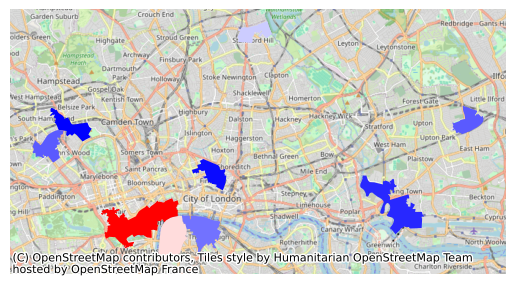

In [62]:
# For m15
# knn.reweight(k=6, inplace=True)
knn.transform = "R"
outliers = esda.moran.Moran_Local(m15.u, knn, permutations=9999)
error_clusters = outliers.q % 2 == 1
error_clusters &= outliers.p_sim <= 0.001
ax = (  gdf2.assign( error_clusters=error_clusters, local_I=outliers.Is
                       ).query("error_clusters"
                       ).sort_values("local_I"
                       ).plot("local_I", cmap="bwr", marker="."))
contextily.add_basemap(ax, crs=gdf2.crs)
ax.set_axis_off();

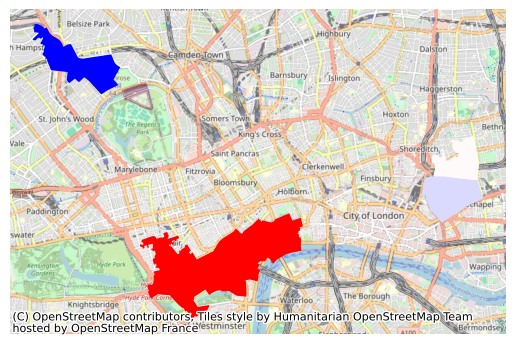

In [63]:
# For m16
# knn.reweight(k=6, inplace=True)
knn.transform = "R"
outliers = esda.moran.Moran_Local(m16.u, knn, permutations=9999)
error_clusters = outliers.q % 2 == 1
error_clusters &= outliers.p_sim <= 0.001
ax = ( gdf2.assign( error_clusters=error_clusters, local_I=outliers.Is
                        ).query("error_clusters"
                        ).sort_values("local_I"
                      ).plot("local_I", cmap="bwr", marker="."))
contextily.add_basemap(ax, crs=gdf2.crs)
ax.set_axis_off();

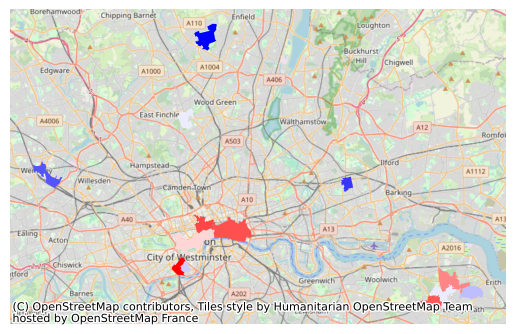

In [64]:
# For m17
# knn.reweight(k=6, inplace=True)
knn.transform = "R"
outliers = esda.moran.Moran_Local(m17.u, knn, permutations=9999)
error_clusters = outliers.q % 2 == 1
error_clusters &= outliers.p_sim <= 0.001
ax = ( gdf2.assign( error_clusters=error_clusters, local_I=outliers.Is
                ).query("error_clusters"
                ).sort_values("local_I"
                ).plot("local_I", cmap="bwr", marker="."))
contextily.add_basemap(ax, crs=gdf2.crs)
ax.set_axis_off();

Burglaries is the only exception to the central London errors pattern

## Errors of OLS with encoded variables

I'll do another OLS because I'm going to change the ommitted columns, after the autocorrelation analysis I will drop the columns with lower Moran's I (less spatially autocorrelated)

In [65]:
gdf4.columns.values

array(['MSOA21CD', 'MSOA21NM_x', 'geometry', 'Log10-tot', 'Log10-VSO',
       'Log10-ASB', 'Log10-Bur', 'Mixed tenures', 'Owned & Private',
       'More private rent', 'More owned', 'More social rent', 'Log10-vac',
       'Most deprived', 'Mixed extremes', 'Mixed less deprived',
       'Mixed most deprived', 'Less deprived', 'Mainly flats',
       'Mainly houses', 'Mixed types', 'Log10-price'], dtype=object)

In [66]:
indvar= ['Mixed tenures', 'Owned & Private', 'More private rent', 'More owned', 'Log10-vac',
       'Most deprived', 'Mixed extremes', 'Mixed most deprived', 'Less deprived', 'Mainly flats',
       'Mainly houses',  'Log10-price']

# Dropped columns to avoid multicollinearity: 'Mixed less deprived', 'Mixed types', 'More social rent',

### OLS (m22, m23, m24, m25) 

In [67]:
# OLS model for total crime as target

m22 = spreg.OLS(gdf4[["Log10-tot"]].values, gdf4[indvar].values,
                name_y="Log10-tot", name_x=indvar)

In [68]:
# Set up table of regression coefficients
def tablecoef(regression):
    return pd.DataFrame({
        # Pull out regression coefficients and
        # flatten as they are returned as Nx1 array
        "Coeff.": regression.betas.flatten(),
        # Pull out and flatten standard errors
        "Std. Error": regression.std_err.flatten(),
        # Pull out P-values from t-stat object
        "P-Value": [round(i[1], 5) for i in regression.t_stat],},
        index=regression.name_x,)

In [69]:
tablecoef(m22)

Coeff.  Std. Error  P-Value
CONSTANT             1.720057    0.225564  0.00000
Mixed tenures        0.046782    0.019279  0.01542
Owned & Private     -0.057228    0.019696  0.00375
More private rent    0.011021    0.018573  0.55307
More owned          -0.141665    0.024927  0.00000
Log10-vac            0.269748    0.035810  0.00000
Most deprived        0.066844    0.017911  0.00020
Mixed extremes       0.124598    0.029576  0.00003
Mixed most deprived  0.053602    0.013897  0.00012
Less deprived       -0.041537    0.014727  0.00489
Mainly flats         0.015276    0.014801  0.30227
Mainly houses       -0.016447    0.014387  0.25324
Log10-price          0.026186    0.060349  0.66445

In [70]:
# OLS model for VSO as target

m23 = spreg.OLS(gdf4[["Log10-VSO"]].values, gdf4[indvar].values,
                name_y="Log10-VSO", name_x=indvar)

In [71]:
tablecoef(m23)

Coeff.  Std. Error  P-Value
CONSTANT             2.381199    0.213456  0.00000
Mixed tenures        0.015604    0.018244  0.39261
Owned & Private     -0.085306    0.018639  0.00001
More private rent   -0.030719    0.017576  0.08081
More owned          -0.176830    0.023589  0.00000
Log10-vac            0.207019    0.033888  0.00000
Most deprived        0.070572    0.016950  0.00003
Mixed extremes       0.148827    0.027988  0.00000
Mixed most deprived  0.064244    0.013151  0.00000
Less deprived       -0.070459    0.013936  0.00000
Mainly flats        -0.001530    0.014006  0.91304
Mainly houses       -0.014774    0.013615  0.27814
Log10-price         -0.291125    0.057109  0.00000

In [72]:
# OLS model for ASB as target

m24 = spreg.OLS(gdf4[["Log10-ASB"]].values, gdf4[indvar].values,
                name_y="Log10-ASB", name_x=indvar)

In [73]:
tablecoef(m24)

Coeff.  Std. Error  P-Value
CONSTANT             0.685817    0.229568  0.00288
Mixed tenures        0.082515    0.019622  0.00003
Owned & Private     -0.031940    0.020046  0.11140
More private rent    0.038166    0.018902  0.04374
More owned          -0.127471    0.025369  0.00000
Log10-vac            0.234882    0.036445  0.00000
Most deprived        0.086137    0.018229  0.00000
Mixed extremes       0.075195    0.030101  0.01265
Mixed most deprived  0.057262    0.014144  0.00006
Less deprived       -0.065018    0.014988  0.00002
Mainly flats         0.043027    0.015064  0.00437
Mainly houses       -0.028485    0.014643  0.05202
Log10-price          0.155281    0.061420  0.01162

In [74]:
# OLS model for burglaries as target

m25 = spreg.OLS(gdf4[["Log10-Bur"]].values, gdf4[indvar].values,
                name_y="Log10-Bur", name_x=indvar)

In [75]:
tablecoef(m25)

Coeff.  Std. Error  P-Value
CONSTANT             0.037583    0.250140  0.88060
Mixed tenures        0.061530    0.021380  0.00409
Owned & Private     -0.011723    0.021842  0.59159
More private rent    0.033569    0.020596  0.10345
More owned          -0.094292    0.027643  0.00067
Log10-vac            0.088720    0.039711  0.02570
Most deprived        0.069579    0.019863  0.00048
Mixed extremes      -0.068273    0.032798  0.03763
Mixed most deprived  0.049644    0.015411  0.00132
Less deprived        0.021290    0.016331  0.19266
Mainly flats         0.005230    0.016413  0.75005
Mainly houses       -0.011262    0.015955  0.48043
Log10-price          0.254271    0.066924  0.00015

In [76]:
ivars= ['Owned & Private', 'More private rent', 'More owned', 'More social rent', 
        'Log10-vac', 'Most deprived', 'Mixed less deprived', 'Mixed most deprived', 'Less deprived', 
        'Mainly flats', 'Mainly houses', 'Log10-price']

In [77]:
m18 = spreg.OLS(gdf4[["Log10-tot"]].values, gdf4[ivars].values,
                name_y="Log10-tot", name_x=ivars)

In [78]:
m19 = spreg.OLS(gdf4[["Log10-VSO"]].values, gdf4[ivars].values,
                name_y="Log10-VSO", name_x=ivars)

In [79]:
m20 = spreg.OLS(gdf4[["Log10-ASB"]].values, gdf4[ivars].values,
                name_y="Log10-ASB", name_x=ivars)

In [80]:
m21 = spreg.OLS(gdf4[["Log10-Bur"]].values, gdf4[ivars].values,
                name_y="Log10-Bur", name_x=ivars)

In [81]:
# R2 comparisson of all models with encoded variables, changing the dropped columns

pd.DataFrame([[m18.r2, m18.ar2, m22.r2, m22.ar2], [m19.r2, m19.ar2, m23.r2, m23.ar2], 
             [m20.r2, m20.ar2, m24.r2, m24.ar2],[m21.r2, m21.ar2, m25.r2, m25.ar2]],
                index=["Total crimes", "VSO", "ASB","Burglaries"],
                columns=["R2", "Adj. R2", "R2 (enc)", "Adj. R2 (enc)"])

R2   Adj. R2  R2 (enc)  Adj. R2 (enc)
Total crimes  0.523655  0.517875  0.523655       0.517875
VSO           0.485820  0.479581  0.485820       0.479581
ASB           0.568382  0.563145  0.568382       0.563145
Burglaries    0.251889  0.242811  0.251889       0.242811

R-squared of all models with encoded variables are the same when changing 2 of the dropped columns

(In excell, comparing the coefficient's tables:
- For total crime: it doesn't change much 
- For violence and sexual offences there is one coefficient more with p-value > 0.05
- For anti-social behaviour there is one coefficient less with p-value > 0.05
- For burglaries there are 2 coefficients more with p-value > 0.05

In [82]:
knn = weights.KNN.from_dataframe(gdf4, k=1)

C:\anaconda\envs\ACV01\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 265 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [83]:
# Checking the residuals of the last regression with these variables (2), for total crime 

lag_residual5 = weights.spatial_lag.lag_spatial(knn, m22.u)

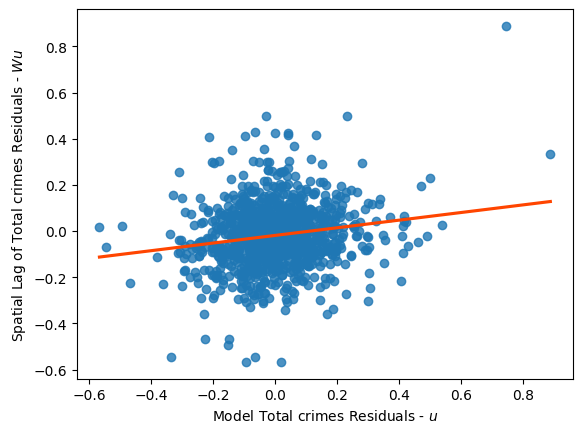

In [84]:
ax = sns.regplot(
    x=m22.u.flatten(),
    y=lag_residual5.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,)
ax.set_xlabel("Model Total crimes Residuals - $u$")
ax.set_ylabel("Spatial Lag of Total crimes Residuals - $W u$");

In [85]:
# Checking the residuals of the first regression with encoded variables (1), for total crime 

lag_residual6 = weights.spatial_lag.lag_spatial(knn, m18.u)

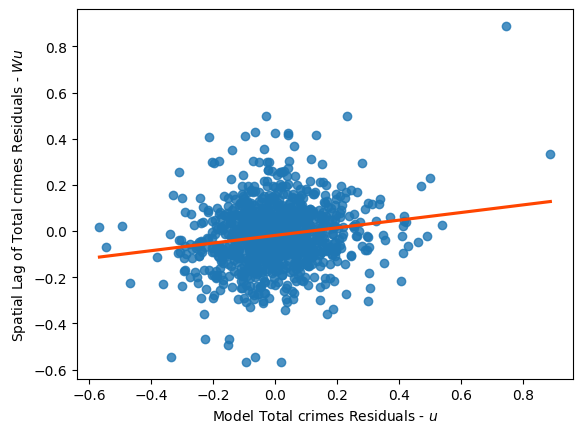

In [86]:
ax = sns.regplot(
    x=m18.u.flatten(),
    y=lag_residual6.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,)
ax.set_xlabel("Model Total crimes Residuals - $u$")
ax.set_ylabel("Spatial Lag of Total crimes Residuals - $W u$");

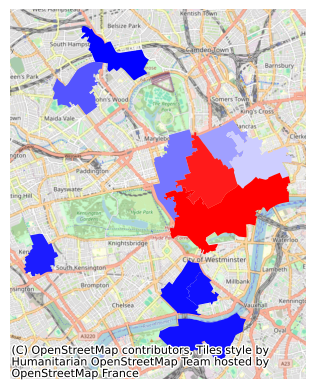

In [87]:
# Map of significantly off errors of the gdf with encoded variables (m18), Total crime

knn.reweight(k=6, inplace=True)
knn.transform = "R"
outliers = esda.moran.Moran_Local(m18.u, knn, permutations=9999)
error_clusters = outliers.q % 2 == 1
error_clusters &= outliers.p_sim <= 0.001
ax = (gdf4.assign(error_clusters=error_clusters, local_I=outliers.Is
                 ).query("error_clusters"
                         ).sort_values("local_I"
                                       ).plot("local_I", cmap="bwr"))
contextily.add_basemap(ax, crs= gdf4.crs),
ax.set_axis_off();

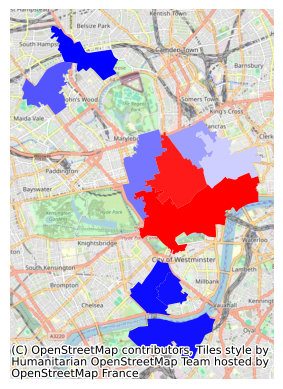

In [88]:
# Map of significant errors of the gdf with encoded variables (m22), Total crime

# knn.reweight(k=6, inplace=True)
knn.transform = "R"
outliers = esda.moran.Moran_Local(m22.u, knn, permutations=9999)
error_clusters = outliers.q % 2 == 1
error_clusters &= outliers.p_sim <= 0.001
ax = (gdf4.assign(error_clusters=error_clusters, local_I=outliers.Is
                   ).query("error_clusters"
                          ).sort_values("local_I"
                                       ).plot("local_I", cmap="bwr"))
contextily.add_basemap(ax, crs= gdf4.crs),
ax.set_axis_off();

### The second model with encoded variables has less areas with significant errors
I'll continue with this group (m22, m23, m24, m25)

In [89]:
knn = weights.KNN.from_dataframe(gdf4, k=1)

C:\anaconda\envs\ACV01\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 265 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [90]:
# Checking the residuals of the regression with encoded variables (m23), for VSO 

lag_residual7 = weights.spatial_lag.lag_spatial(knn, m23.u)

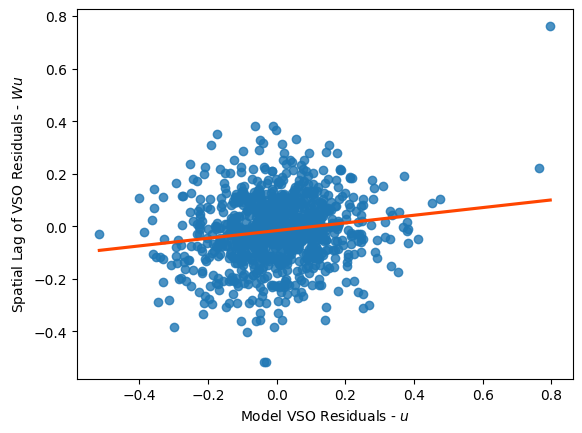

In [91]:
ax = sns.regplot(
    x=m23.u.flatten(),
    y=lag_residual7.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Model VSO Residuals - $u$")
ax.set_ylabel("Spatial Lag of VSO Residuals - $W u$");

In [92]:
# Checking the residuals of the regression with encoded variables (m24), for ASB 

lag_residual8 = weights.spatial_lag.lag_spatial(knn, m24.u)

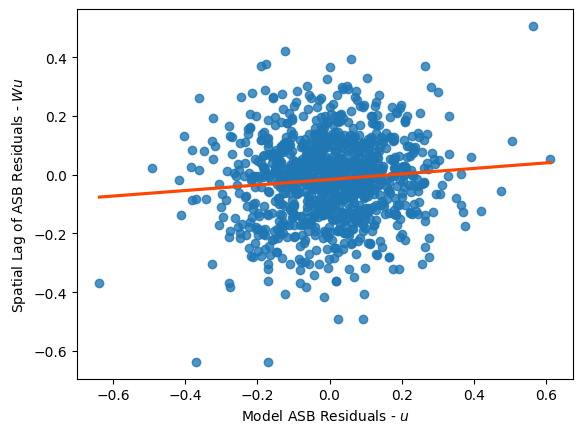

In [93]:
ax = sns.regplot(
    x=m24.u.flatten(),
    y=lag_residual8.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Model ASB Residuals - $u$")
ax.set_ylabel("Spatial Lag of ASB Residuals - $W u$");

In [94]:
# Checking the residuals of the regression with encoded variables (m25), for burglaries 

lag_residual9 = weights.spatial_lag.lag_spatial(knn, m25.u)

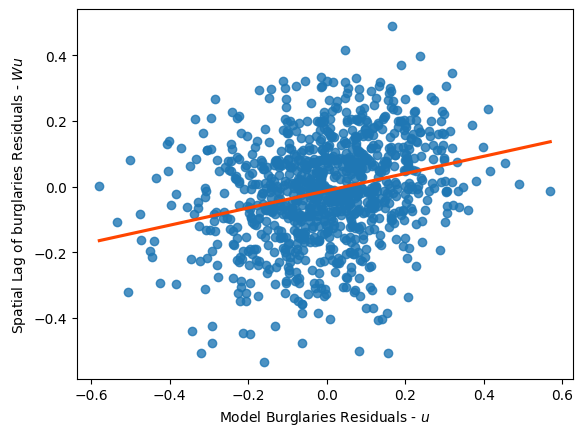

In [95]:
ax = sns.regplot(
    x=m25.u.flatten(),
    y=lag_residual9.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Model Burglaries Residuals - $u$")
ax.set_ylabel("Spatial Lag of burglaries Residuals - $W u$");

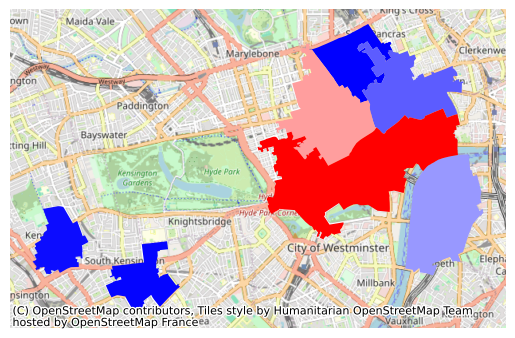

In [96]:
# Map of significant errors of the gdf with encoded variables (m23), VSO

knn.reweight(k=6, inplace=True)
knn.transform = "R"
outliers = esda.moran.Moran_Local(m23.u, knn, permutations=9999)
error_clusters = outliers.q % 2 == 1
error_clusters &= outliers.p_sim <= 0.001
ax = (gdf4.assign( error_clusters=error_clusters, local_I=outliers.Is
                 ).query("error_clusters"
                         ).sort_values("local_I"
                                       ).plot("local_I", cmap="bwr"))
contextily.add_basemap(ax, crs=gdf4.crs),
ax.set_axis_off();

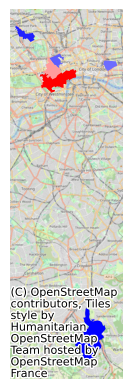

In [97]:
# Map of significant errors of the gdf with encoded variables (m24), ASB

# knn.reweight(k=6, inplace=True)
knn.transform = "R"
outliers = esda.moran.Moran_Local(m24.u, knn, permutations=9999)
error_clusters = outliers.q % 2 == 1
error_clusters &= outliers.p_sim <= 0.001
ax = (  gdf4.assign( error_clusters=error_clusters, local_I=outliers.Is
                   ).query("error_clusters"
                          ).sort_values("local_I"
                                       ).plot("local_I", cmap="bwr"))
contextily.add_basemap(ax, crs=gdf4.crs),
ax.set_axis_off();

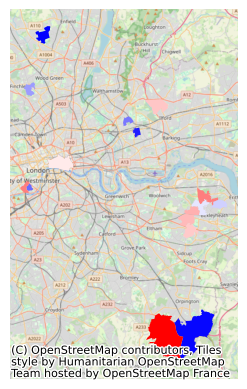

In [98]:
# Map of significant errors of the gdf with encoded variables (m25), burglaries

# knn.reweight(k=6, inplace=True)
knn.transform = "R"
outliers = esda.moran.Moran_Local(m25.u, knn, permutations=9999)
error_clusters = outliers.q % 2 == 1
error_clusters &= outliers.p_sim <= 0.001
ax = (  gdf4.assign( error_clusters=error_clusters, local_I=outliers.Is
                   ).query("error_clusters"
                          ).sort_values("local_I"
                                       ).plot("local_I", cmap="bwr", marker="."))
contextily.add_basemap(ax, crs=gdf4.crs),
ax.set_axis_off();

Again, burglaries is the only model with no significantly off errors in Westminster

# Distance to Westminster018

In [106]:
dist = pd.read_csv('Analysis_files/Distance-Westminster018.csv')

In [107]:
dist.head()

MSOA21CD                  MSOA21NM  Dist-Westminster018  Central
0  E02000001        City of London 001             2.911519        1
1  E02000002  Barking and Dagenham 001            20.911234        0
2  E02000003  Barking and Dagenham 002            20.417912        0
3  E02000004  Barking and Dagenham 003            22.145152        0
4  E02000005  Barking and Dagenham 004            20.079083        0

In [108]:
gdf4.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSOA21CD             1002 non-null   object  
 1   MSOA21NM_x           1002 non-null   object  
 2   geometry             1002 non-null   geometry
 3   Log10-tot            1002 non-null   float64 
 4   Log10-VSO            1002 non-null   float64 
 5   Log10-ASB            1002 non-null   float64 
 6   Log10-Bur            1002 non-null   float64 
 7   Mixed tenures        1002 non-null   float64 
 8   Owned & Private      1002 non-null   float64 
 9   More private rent    1002 non-null   float64 
 10  More owned           1002 non-null   float64 
 11  More social rent     1002 non-null   float64 
 12  Log10-vac            1002 non-null   float64 
 13  Most deprived        1002 non-null   float64 
 14  Mixed extremes       1002 non-null   float64 
 15  Mixed less de

In [109]:
gdf5 = gdf4.merge(dist, on= 'MSOA21CD')

In [110]:
gdf5.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSOA21CD             1002 non-null   object  
 1   MSOA21NM_x           1002 non-null   object  
 2   geometry             1002 non-null   geometry
 3   Log10-tot            1002 non-null   float64 
 4   Log10-VSO            1002 non-null   float64 
 5   Log10-ASB            1002 non-null   float64 
 6   Log10-Bur            1002 non-null   float64 
 7   Mixed tenures        1002 non-null   float64 
 8   Owned & Private      1002 non-null   float64 
 9   More private rent    1002 non-null   float64 
 10  More owned           1002 non-null   float64 
 11  More social rent     1002 non-null   float64 
 12  Log10-vac            1002 non-null   float64 
 13  Most deprived        1002 non-null   float64 
 14  Mixed extremes       1002 non-null   float64 
 15  Mixed less de

In [111]:
gdf6 = gdf5.drop(['MSOA21NM_x', 'Central'], axis= 1)

In [112]:
gdf6.head(3)

MSOA21CD                                           geometry  Log10-tot  \
0  E02000001  POLYGON ((-10745.754 6714323.896, -10739.051 6...   2.857743   
1  E02000002  POLYGON ((16483.151 6727503.65, 16482.04 67274...   1.996037   
2  E02000003  POLYGON ((16524.713 6724686.286, 16517.809 672...   2.023418   

   Log10-VSO  Log10-ASB  Log10-Bur  Mixed tenures  Owned & Private  \
0   2.072601   2.063628   1.416344            0.0              0.0   
1   1.492455   1.399701   1.061510            0.0              0.0   
2   1.425950   1.461036   1.243385            0.0              1.0   

   More private rent  More owned  ...  Mixed extremes  Mixed less deprived  \
0                1.0         0.0  ...             1.0                  0.0   
1                0.0         0.0  ...             0.0                  0.0   
2                0.0         0.0  ...             0.0                  0.0   

   Mixed most deprived  Less deprived  Mainly flats  Mainly houses  \
0                  0.0            0.0           1.0            0.0   
1                  0.0            0.0           0.0            1.0   
2                  1.0            0.0           0.0            1.0   

   Mixed types  Log10-price                  MSOA21NM  Dist-Westminster018  
0          0.0     4.091751        City of London 001             2.911519  
1          0.0     3.640018  Barking and Dagenham 001            20.911234  
2          0.0     3.636683  Barking and Dagenham 002            20.417912  

[3 rows x 23 columns]

In [113]:
gdf6.describe()

Log10-tot    Log10-VSO    Log10-ASB    Log10-Bur  Mixed tenures  \
count  1002.000000  1002.000000  1002.000000  1002.000000    1002.000000   
mean      2.021889     1.388100     1.475488     1.102106       0.171657   
std       0.209562     0.190877     0.224060     0.185440       0.377270   
min       1.465178     0.809611     0.767274     0.374816       0.000000   
25%       1.893502     1.271031     1.330601     0.994461       0.000000   
50%       2.011300     1.401225     1.469582     1.108923       0.000000   
75%       2.126959     1.502245     1.610112     1.225135       0.000000   
max       3.284774     2.388835     2.479761     1.726746       1.000000   

       Owned & Private  More private rent   More owned  More social rent  \
count      1002.000000        1002.000000  1002.000000       1002.000000   
mean          0.272455           0.260479     0.187625          0.107784   
std           0.445445           0.439115     0.390607          0.310263   
min           0.000000           0.000000     0.000000          0.000000   
25%           0.000000           0.000000     0.000000          0.000000   
50%           0.000000           0.000000     0.000000          0.000000   
75%           1.000000           1.000000     0.000000          0.000000   
max           1.000000           1.000000     1.000000          1.000000   

         Log10-vac  Most deprived  Mixed extremes  Mixed less deprived  \
count  1002.000000    1002.000000     1002.000000          1002.000000   
mean      0.775243       0.203593        0.049900             0.272455   
std       0.245874       0.402871        0.217847             0.445445   
min       0.279577       0.000000        0.000000             0.000000   
25%       0.600787       0.000000        0.000000             0.000000   
50%       0.750847       0.000000        0.000000             0.000000   
75%       0.904026       0.000000        0.000000             1.000000   
max       1.723497       1.000000        1.000000             1.000000   

       Mixed most deprived  Less deprived  Mainly flats  Mainly houses  \
count          1002.000000    1002.000000   1002.000000    1002.000000   
mean              0.292415       0.181637      0.200599       0.434132   
std               0.455099       0.385737      0.400648       0.495890   
min               0.000000       0.000000      0.000000       0.000000   
25%               0.000000       0.000000      0.000000       0.000000   
50%               0.000000       0.000000      0.000000       0.000000   
75%               1.000000       0.000000      0.000000       1.000000   
max               1.000000       1.000000      1.000000       1.000000   

       Mixed types  Log10-price  Dist-Westminster018  
count  1002.000000  1002.000000          1002.000000  
mean      0.365269     3.822779            12.402037  
std       0.481746     0.134446             5.776502  
min       0.000000     3.558282             0.000000  
25%       0.000000     3.722061             7.772784  
50%       0.000000     3.798331            12.240853  
75%       1.000000     3.904272            16.635471  
max       1.000000     4.368728            30.103597

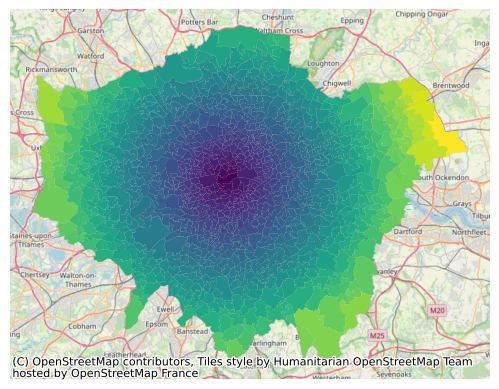

In [114]:
# Visualising the distance to Westminster018
ax = gdf6.plot("Dist-Westminster018", marker=".")
contextily.add_basemap(ax, crs=gdf6.crs)
ax.set_axis_off();

## OLS (m26, m27, m28, m29)

With the encoded variables and distance to Westminster018

In [115]:
gdf6.columns.values

array(['MSOA21CD', 'geometry', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', 'Mixed tenures', 'Owned & Private',
       'More private rent', 'More owned', 'More social rent', 'Log10-vac',
       'Most deprived', 'Mixed extremes', 'Mixed less deprived',
       'Mixed most deprived', 'Less deprived', 'Mainly flats',
       'Mainly houses', 'Mixed types', 'Log10-price', 'MSOA21NM',
       'Dist-Westminster018'], dtype=object)

In [116]:
ivars= ['Mixed tenures', 'Owned & Private', 'More private rent', 'More owned', 'Log10-vac',
       'Mixed extremes', 'Most deprived', 'Mixed most deprived', 'Less deprived', 'Mainly flats',
       'Mainly houses', 'Log10-price', 'Dist-Westminster018']

# Dropped columns to avoid multicollinearity: 'More social rent', 'Mixed less deprived', 'Mixed types'

In [117]:
# OLS model for total crime as target

m26 = spreg.OLS(gdf6[["Log10-tot"]].values, gdf6[ivars].values,
                name_y="Log10-tot", name_x=ivars)

In [118]:
# OLS model for VSO as target

m27 = spreg.OLS(gdf6[["Log10-VSO"]].values, gdf6[ivars].values,
                name_y="Log10-VSO", name_x=ivars)

In [119]:
# OLS model for ASB as target

m28 = spreg.OLS(gdf6[["Log10-ASB"]].values, gdf6[ivars].values,
                name_y="Log10-ASB", name_x=ivars)

In [120]:
# OLS model for Burglaries as target

m29 = spreg.OLS(gdf6[["Log10-Bur"]].values, gdf6[ivars].values,
                name_y="Log10-Bur", name_x=ivars)

In [121]:
# R2 comparisson of models with encoded variables and distance to Westminster018

pd.DataFrame(
    [[m22.r2, m22.ar2, m26.r2, m26.ar2], [m23.r2, m23.ar2, m27.r2, m27.ar2], [m24.r2, m24.ar2, m28.r2, m28.ar2],[m25.r2, m25.ar2, m29.r2, m29.ar2]],
    index=["Total crimes", "VSO", "ASB","Burglaries"],
    columns=["R2 (encoded)", "Adj. R2", "R2 (with distance)", "Adj. R2"],
)

R2 (encoded)   Adj. R2  R2 (with distance)   Adj. R2
Total crimes      0.523655  0.517875            0.523788  0.517522
VSO               0.485820  0.479581            0.485826  0.479060
ASB               0.568382  0.563145            0.568426  0.562747
Burglaries        0.251889  0.242811            0.264457  0.254778

Very small increase of R2s

In [122]:
tablecoef(m26)

Coeff.  Std. Error  P-Value
CONSTANT             1.821277    0.296906  0.00000
Mixed tenures        0.045526    0.019434  0.01935
Owned & Private     -0.056174    0.019806  0.00466
More private rent    0.010919    0.018581  0.55689
More owned          -0.138520    0.025647  0.00000
Log10-vac            0.271592    0.035995  0.00000
Mixed extremes       0.125885    0.029688  0.00002
Most deprived        0.066477    0.017932  0.00022
Mixed most deprived  0.053222    0.013921  0.00014
Less deprived       -0.041291    0.014739  0.00519
Mainly flats         0.013595    0.015149  0.36970
Mainly houses       -0.014980    0.014662  0.30720
Log10-price          0.001880    0.076104  0.98030
Dist-Westminster018 -0.000854    0.001628  0.60002

In [123]:
tablecoef(m27)

Coeff.  Std. Error  P-Value
CONSTANT             2.361645    0.281006  0.00000
Mixed tenures        0.015846    0.018394  0.38917
Owned & Private     -0.085510    0.018745  0.00001
More private rent   -0.030700    0.017586  0.08117
More owned          -0.177438    0.024273  0.00000
Log10-vac            0.206663    0.034067  0.00000
Mixed extremes       0.148578    0.028098  0.00000
Most deprived        0.070643    0.016971  0.00003
Mixed most deprived  0.064317    0.013176  0.00000
Less deprived       -0.070507    0.013950  0.00000
Mainly flats        -0.001205    0.014338  0.93303
Mainly houses       -0.015058    0.013877  0.27816
Log10-price         -0.286430    0.072028  0.00007
Dist-Westminster018  0.000165    0.001541  0.91476

In [124]:
tablecoef(m28)

Coeff.  Std. Error  P-Value
CONSTANT             0.747491    0.302203  0.01355
Mixed tenures        0.081750    0.019781  0.00004
Owned & Private     -0.031298    0.020159  0.12085
More private rent    0.038105    0.018912  0.04419
More owned          -0.125555    0.026104  0.00000
Log10-vac            0.236005    0.036637  0.00000
Mixed extremes       0.075979    0.030218  0.01208
Most deprived        0.085913    0.018252  0.00000
Mixed most deprived  0.057030    0.014170  0.00006
Less deprived       -0.064868    0.015002  0.00002
Mainly flats         0.042003    0.015419  0.00656
Mainly houses       -0.027590    0.014924  0.06479
Log10-price          0.140471    0.077461  0.07007
Dist-Westminster018 -0.000520    0.001657  0.75358

In [125]:
tablecoef(m29)

Coeff.  Std. Error  P-Value
CONSTANT             0.909524    0.326523  0.00545
Mixed tenures        0.050711    0.021373  0.01785
Owned & Private     -0.002648    0.021781  0.90326
More private rent    0.032696    0.020434  0.10990
More owned          -0.067201    0.028205  0.01738
Log10-vac            0.104599    0.039585  0.00836
Mixed extremes      -0.057191    0.032649  0.08014
Most deprived        0.066417    0.019720  0.00079
Mixed most deprived  0.046373    0.015310  0.00252
Less deprived        0.023410    0.016210  0.14901
Mainly flats        -0.009249    0.016660  0.57892
Mainly houses        0.001383    0.016125  0.93169
Log10-price          0.044893    0.083695  0.59181
Dist-Westminster018 -0.007357    0.001791  0.00004

In [126]:
knn = weights.KNN.from_dataframe(gdf6, k=1)

C:\anaconda\envs\ACV01\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 265 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


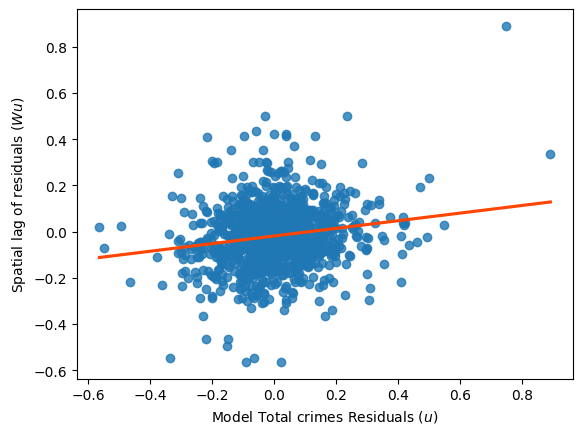

In [127]:
lag_residual10 = weights.spatial_lag.lag_spatial(knn, m26.u)
ax = sns.regplot(
    x=m26.u.flatten(),
    y=lag_residual10.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Model Total crimes Residuals ($u$)")
ax.set_ylabel("Spatial lag of residuals ($Wu$)");

The structure of errors still looks to be spatial

## With variables as rates (m30, m31, m32, m33)

In [128]:
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSOA21CD        1002 non-null   object  
 1   MSOA21NM_x      1002 non-null   object  
 2   geometry        1002 non-null   geometry
 3   Log10-tot       1002 non-null   float64 
 4   Log10-VSO       1002 non-null   float64 
 5   Log10-ASB       1002 non-null   float64 
 6   Log10-Bur       1002 non-null   float64 
 7   %_not deprived  1002 non-null   float64 
 8   %_deprived-1    1002 non-null   float64 
 9   %_deprived-2    1002 non-null   float64 
 10  %_deprived-3    1002 non-null   float64 
 11  %_deprived-4    1002 non-null   float64 
 12  Empty %         1002 non-null   float64 
 13  %_Houses        1002 non-null   float64 
 14  %_Flats         1002 non-null   float64 
 15  %_Other         1002 non-null   float64 
 16  %_Owned         1002 non-null   float64 
 17  %_Soci

In [129]:
gdf7 = gdf2.merge(dist, on= 'MSOA21CD')

In [130]:
gdf7.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MSOA21CD             1002 non-null   object  
 1   MSOA21NM_x           1002 non-null   object  
 2   geometry             1002 non-null   geometry
 3   Log10-tot            1002 non-null   float64 
 4   Log10-VSO            1002 non-null   float64 
 5   Log10-ASB            1002 non-null   float64 
 6   Log10-Bur            1002 non-null   float64 
 7   %_not deprived       1002 non-null   float64 
 8   %_deprived-1         1002 non-null   float64 
 9   %_deprived-2         1002 non-null   float64 
 10  %_deprived-3         1002 non-null   float64 
 11  %_deprived-4         1002 non-null   float64 
 12  Empty %              1002 non-null   float64 
 13  %_Houses             1002 non-null   float64 
 14  %_Flats              1002 non-null   float64 
 15  %_Other      

In [131]:
gdf8 = gdf7.drop(['MSOA21NM_x', 'Central'], axis= 1)

In [132]:
gdf8.columns.values

array(['MSOA21CD', 'geometry', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', '%_not deprived', '%_deprived-1', '%_deprived-2',
       '%_deprived-3', '%_deprived-4', 'Empty %', '%_Houses', '%_Flats',
       '%_Other', '%_Owned', '%_Social-rent', '%_Private-rent',
       'Log10-price', 'MSOA21NM', 'Dist-Westminster018'], dtype=object)

In [133]:
ivar = ['%_not deprived', '%_deprived-1', '%_deprived-2', '%_deprived-3', '%_deprived-4', 
        'Empty %', '%_Houses', '%_Flats', '%_Other', '%_Owned', '%_Social-rent', '%_Private-rent',
       'Log10-price', 'Dist-Westminster018']

In [134]:
# OLS model for total crime as target

m30 = spreg.OLS(gdf8[["Log10-tot"]].values, gdf8[ivar].values,
                name_y="Log10-tot", name_x=ivar)

In [135]:
# OLS model for VSO as target

m31 = spreg.OLS(gdf8[["Log10-VSO"]].values, gdf8[ivar].values,
                name_y="Log10-VSO", name_x=ivar)

In [136]:
# OLS model for ASB as target

m32 = spreg.OLS(gdf8[["Log10-ASB"]].values, gdf8[ivar].values,
                name_y="Log10-ASB", name_x=ivar)

In [137]:
# OLS model for burglaries as target

m33 = spreg.OLS(gdf8[["Log10-Bur"]].values, gdf8[ivar].values,
                name_y="Log10-Bur", name_x=ivar)

In [138]:
# R2 comparisson of models with rated variables and distance to Westminster018

pd.DataFrame(
    [[m14.r2, m14.ar2, m30.r2, m30.ar2], [m15.r2, m15.ar2, m31.r2, m31.ar2], [m16.r2, m16.ar2, m32.r2, m32.ar2],[m17.r2, m17.ar2, m33.r2, m33.ar2]],
    index=["Total crimes", "VSO", "ASB","Burglaries"],
    columns=["R2 (rated)", "Adj. R2", "R2 (with distance)", "Adj. R2"],
)

R2 (rated)   Adj. R2  R2 (with distance)   Adj. R2
Total crimes    0.565505  0.559788            0.566117  0.559962
VSO             0.526181  0.519946            0.528182  0.521489
ASB             0.607017  0.601846            0.607948  0.602387
Burglaries      0.276469  0.266949            0.281958  0.271773

Again the R2 increase just slightly, but the p-values of the coefficents are all over the place, so these models are not reliable

In [139]:
tablecoef(m30)

Coeff.  Std. Error  P-Value
CONSTANT            -1.181730    9.527181  0.90131
%_not deprived       0.030510    0.102185  0.76533
%_deprived-1         0.028282    0.102251  0.78215
%_deprived-2         0.043189    0.102174  0.67260
%_deprived-3         0.021892    0.102628  0.83112
%_deprived-4         0.054217    0.104457  0.60386
Empty %              0.046801    0.095220  0.62318
%_Houses             0.012149    0.091140  0.89398
%_Flats              0.012065    0.091144  0.89471
%_Other              0.013976    0.091118  0.87813
%_Owned             -0.014892    0.004659  0.00143
%_Social-rent       -0.010650    0.004881  0.02936
%_Private-rent      -0.009090    0.004865  0.06202
Log10-price         -0.025734    0.080094  0.74805
Dist-Westminster018  0.001940    0.001644  0.23845

In [140]:
tablecoef(m31)

Coeff.  Std. Error  P-Value
CONSTANT             0.787527    9.049125  0.93067
%_not deprived      -0.041599    0.097057  0.66831
%_deprived-1        -0.043079    0.097120  0.65746
%_deprived-2        -0.026442    0.097047  0.78532
%_deprived-3        -0.051665    0.097478  0.59622
%_deprived-4        -0.025192    0.099216  0.79961
Empty %              0.030616    0.090442  0.73504
%_Houses             0.069704    0.086567  0.42089
%_Flats              0.069015    0.086571  0.42552
%_Other              0.071501    0.086546  0.40891
%_Owned             -0.015949    0.004425  0.00033
%_Social-rent       -0.010550    0.004636  0.02309
%_Private-rent      -0.011016    0.004621  0.01732
Log10-price         -0.308782    0.076075  0.00005
Dist-Westminster018  0.003196    0.001562  0.04101

In [141]:
tablecoef(m32)

Coeff.  Std. Error  P-Value
CONSTANT            -2.963476    9.682816  0.75963
%_not deprived       0.003579    0.103854  0.97252
%_deprived-1         0.002650    0.103921  0.97966
%_deprived-2         0.017885    0.103843  0.86329
%_deprived-3        -0.000705    0.104304  0.99461
%_deprived-4         0.044925    0.106164  0.67226
Empty %              0.047354    0.096776  0.62473
%_Houses             0.044162    0.092629  0.63364
%_Flats              0.045209    0.092633  0.62563
%_Other              0.046063    0.092607  0.61901
%_Owned             -0.016423    0.004735  0.00055
%_Social-rent       -0.013127    0.004961  0.00827
%_Private-rent      -0.010067    0.004945  0.04203
Log10-price          0.175948    0.081403  0.03090
Dist-Westminster018  0.002559    0.001671  0.12605

In [142]:
tablecoef(m33)

Coeff.  Std. Error  P-Value
CONSTANT            -2.386773   10.845353  0.82586
%_not deprived       0.115087    0.116323  0.32272
%_deprived-1         0.111511    0.116398  0.33829
%_deprived-2         0.121461    0.116310  0.29661
%_deprived-3         0.115402    0.116827  0.32349
%_deprived-4         0.192501    0.118910  0.10579
Empty %              0.028593    0.108395  0.79200
%_Houses            -0.068643    0.103751  0.50837
%_Flats             -0.069309    0.103755  0.50428
%_Other             -0.068220    0.103725  0.51088
%_Owned             -0.018359    0.005303  0.00056
%_Social-rent       -0.017223    0.005557  0.00199
%_Private-rent      -0.013837    0.005538  0.01264
Log10-price          0.151919    0.091176  0.09599
Dist-Westminster018 -0.005142    0.001872  0.00612

In [143]:
knn = weights.KNN.from_dataframe(gdf8, k=1)

C:\anaconda\envs\ACV01\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 265 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


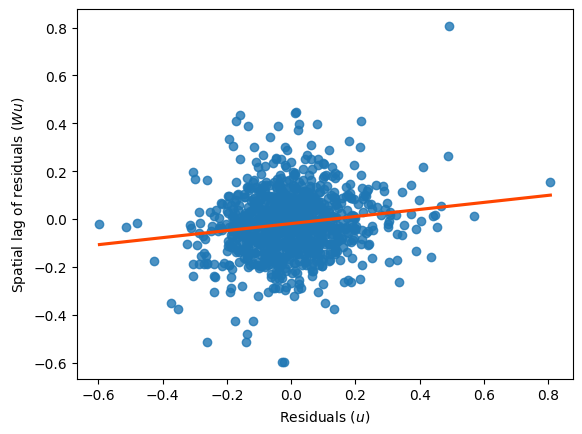

In [144]:
lag_residual14 = weights.spatial_lag.lag_spatial(knn, m30.u)
ax = sns.regplot(
    x=m30.u.flatten(),
    y=lag_residual14.flatten(),
    line_kws=dict(color="orangered"),
    ci=None,
)
ax.set_xlabel("Residuals ($u$)")
ax.set_ylabel("Spatial lag of residuals ($Wu$)");

# Spatial fixed effects
from https://geographicdata.science/book/notebooks/11_regression.html

In [145]:
# New df from the last with encoded values and spatial variable

gdf9 = gdf5.drop(['MSOA21NM_x', 'Dist-Westminster018'], axis= 1)

In [146]:
gdf9.describe()

Log10-tot    Log10-VSO    Log10-ASB    Log10-Bur  Mixed tenures  \
count  1002.000000  1002.000000  1002.000000  1002.000000    1002.000000   
mean      2.021889     1.388100     1.475488     1.102106       0.171657   
std       0.209562     0.190877     0.224060     0.185440       0.377270   
min       1.465178     0.809611     0.767274     0.374816       0.000000   
25%       1.893502     1.271031     1.330601     0.994461       0.000000   
50%       2.011300     1.401225     1.469582     1.108923       0.000000   
75%       2.126959     1.502245     1.610112     1.225135       0.000000   
max       3.284774     2.388835     2.479761     1.726746       1.000000   

       Owned & Private  More private rent   More owned  More social rent  \
count      1002.000000        1002.000000  1002.000000       1002.000000   
mean          0.272455           0.260479     0.187625          0.107784   
std           0.445445           0.439115     0.390607          0.310263   
min           0.000000           0.000000     0.000000          0.000000   
25%           0.000000           0.000000     0.000000          0.000000   
50%           0.000000           0.000000     0.000000          0.000000   
75%           1.000000           1.000000     0.000000          0.000000   
max           1.000000           1.000000     1.000000          1.000000   

         Log10-vac  Most deprived  Mixed extremes  Mixed less deprived  \
count  1002.000000    1002.000000     1002.000000          1002.000000   
mean      0.775243       0.203593        0.049900             0.272455   
std       0.245874       0.402871        0.217847             0.445445   
min       0.279577       0.000000        0.000000             0.000000   
25%       0.600787       0.000000        0.000000             0.000000   
50%       0.750847       0.000000        0.000000             0.000000   
75%       0.904026       0.000000        0.000000             1.000000   
max       1.723497       1.000000        1.000000             1.000000   

       Mixed most deprived  Less deprived  Mainly flats  Mainly houses  \
count          1002.000000    1002.000000   1002.000000    1002.000000   
mean              0.292415       0.181637      0.200599       0.434132   
std               0.455099       0.385737      0.400648       0.495890   
min               0.000000       0.000000      0.000000       0.000000   
25%               0.000000       0.000000      0.000000       0.000000   
50%               0.000000       0.000000      0.000000       0.000000   
75%               1.000000       0.000000      0.000000       1.000000   
max               1.000000       1.000000      1.000000       1.000000   

       Mixed types  Log10-price      Central  
count  1002.000000  1002.000000  1002.000000  
mean      0.365269     3.822779     0.404192  
std       0.481746     0.134446     0.490980  
min       0.000000     3.558282     0.000000  
25%       0.000000     3.722061     0.000000  
50%       0.000000     3.798331     0.000000  
75%       1.000000     3.904272     1.000000  
max       1.000000     4.368728     1.000000

In [147]:
gdf9.columns.values

array(['MSOA21CD', 'geometry', 'Log10-tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', 'Mixed tenures', 'Owned & Private',
       'More private rent', 'More owned', 'More social rent', 'Log10-vac',
       'Most deprived', 'Mixed extremes', 'Mixed less deprived',
       'Mixed most deprived', 'Less deprived', 'Mainly flats',
       'Mainly houses', 'Mixed types', 'Log10-price', 'MSOA21NM',
       'Central'], dtype=object)

In [148]:
# Model wasn't working with spaces or '&' or '-' in the column's names

gdf9.columns = gdf9.columns.str.replace(" ","_")

In [149]:
gdf9.rename(columns={"Log10-tot": "Log10_tot", "Owned_&_Private": "Owned_Private", 
                     "Log10-vac": "Log10_vac", "Log10-price": "Log10_price"}, inplace= True)

In [150]:
gdf9.columns.values

array(['MSOA21CD', 'geometry', 'Log10_tot', 'Log10-VSO', 'Log10-ASB',
       'Log10-Bur', 'Mixed_tenures', 'Owned_Private', 'More_private_rent',
       'More_owned', 'More_social_rent', 'Log10_vac', 'Most_deprived',
       'Mixed_extremes', 'Mixed_less_deprived', 'Mixed_most_deprived',
       'Less_deprived', 'Mainly_flats', 'Mainly_houses', 'Mixed_types',
       'Log10_price', 'MSOA21NM', 'Central'], dtype=object)

In [151]:
ivarss = ['Mixed_tenures', 'Owned_Private', 'More_private_rent', 'More_owned', 'Log10_vac', 
          'Most_deprived', 'Mixed_extremes', 'Mixed_most_deprived', 'Less_deprived', 
          'Mainly_flats', 'Mainly_houses', 'Log10_price', 'Central']

# Dropped: 'More social rent', 'Mixed less deprived', 'Mixed types'

In [152]:
# Formula 

f1 = ("Log10_tot ~ " + " + ".join(ivarss) + " - 1")
print(f1)

Log10_tot ~ Mixed_tenures + Owned_Private + More_private_rent + More_owned + Log10_vac + Most_deprived + Mixed_extremes + Mixed_most_deprived + Less_deprived + Mainly_flats + Mainly_houses + Log10_price + Central - 1


"Critically, note that the trailing -1 term means that we are fitting this model without an intercept term. This is necessary, since including an intercept term alongside unique means for every neighborhood would make the underlying system of equations underspecified."

In [153]:
m34 = sm.ols(f1, data=gdf9).fit()

In [154]:
print(m34.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.995    
Dependent Variable:     Log10_tot        AIC:                         -970.8796
Date:                   2024-11-28 11:41 BIC:                         -907.0528
No. Observations:       1002             Log-Likelihood:              498.44   
Df Model:               13               F-statistic:                 1.444e+04
Df Residuals:           989              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.995            Scale:                       0.021934 
---------------------------------------------------------------------------------
                         Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------------------
Mixed_tenures            0.0514     0.0197    2.6084   0.0092    0.0127    0.0900
Owned_Private           -0.0539     0.0203   -2.6508   0

In [155]:
pd.DataFrame({
        # Pull out regression coefficients and
        # flatten as they are returned as Nx1 array
        "Coeff.": m34.params[ivarss],
        # Pull out and flatten standard errors
        "Std. Error": m34.bse[ivarss],
        # Pull out P-values from t-stat object
        "P-Value": m34.pvalues[ivarss]})

Coeff.  Std. Error        P-Value
Mixed_tenures        0.051376    0.019696   9.233575e-03
Owned_Private       -0.053930    0.020345   8.158158e-03
More_private_rent    0.017666    0.018891   3.499591e-01
More_owned          -0.131382    0.025662   3.674968e-07
Log10_vac            0.221374    0.035500   6.646526e-10
Most_deprived        0.115140    0.016588   7.020054e-12
Mixed_extremes       0.056206    0.028892   5.201423e-02
Mixed_most_deprived  0.076297    0.013632   2.828441e-08
Less_deprived       -0.068104    0.014483   2.938990e-06
Mainly_flats         0.024196    0.015138   1.102709e-01
Mainly_houses       -0.003044    0.014484   8.335933e-01
Log10_price          0.486826    0.008689  3.832366e-309
Central             -0.062163    0.013309   3.414603e-06

- We can see the significance of the variable 'Central' in the model in comparison with the other variables, but not the whole model, because the equation has no intercept.
- It has a negative relationship with crime and statistic significance.
- But, since we only have this spatial variable here, we can't compare to other neighbourhoods.

In [156]:
ivar2 = ['Mixed_tenures', 'Owned_Private', 'More_private_rent', 'More_owned', 'Log10_vac', 
          'Most_deprived', 'Mixed_extremes', 'Mixed_most_deprived', 'Less_deprived', 
          'Mainly_flats', 'Mainly_houses', 'Log10_price']
# ivarss without 'Central'

In [157]:
# spreg spatial fixed effect implementation, just changing the intercept

m35 = spreg.OLS_Regimes(
    # Dependent variable
    gdf9[["Log10_tot"]].values,
    # Independent variables
    gdf9[ivar2].values,
    # Variable specifying neighborhood membership
    gdf9["Central"].tolist(),
    # Allow the constant term to vary by group/regime
    constant_regi="many",
    # Variables to be allowed to vary (True) or kept
    # constant (False). Here we set all to False
    cols2regi=[False] * len(ivar2),
    # Allow separate sigma coefficients to be estimated
    # by regime (False so a single sigma)
    regime_err_sep=False,
    # Dependent variable name
    name_y="Log10_tot",
    # Independent variables names
    name_x=ivar2,
)

In [158]:
print(m35.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES - REGIMES
---------------------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10_tot                Number of Observations:        1002
Mean dependent var  :      2.0219                Number of Variables   :          14
S.D. dependent var  :      0.2096                Degrees of Freedom    :         988
R-squared           :      0.5266
Adjusted R-squared  :      0.5203
Sum squared residual:     20.8124                F-statistic           :     84.5285
Sigma-square        :       0.021                Prob(F-statistic)     :  2.651e-150
S.E. of regression  :       0.145                Log likelihood        :     519.200
Sigma-square ML     :       0.021                Akaike info criterion :   -1010.401
S.E of regression ML:      0.1441                Schwarz criterion     :    -941.664

----------------------------------------

In [159]:
tablecoef(m35)

Coeff.  Std. Error  P-Value
0_CONSTANT                   1.534214    0.237296  0.00000
1_CONSTANT                   1.500321    0.242020  0.00000
_Global_Mixed_tenures        0.050885    0.019302  0.00851
_Global_Owned_Private       -0.066961    0.020039  0.00086
_Global_More_private_rent    0.007527    0.018580  0.68548
_Global_More_owned          -0.154465    0.025400  0.00000
_Global_Log10_vac            0.278331    0.035888  0.00000
_Global_Most_deprived        0.067208    0.017866  0.00018
_Global_Mixed_extremes       0.115176    0.029747  0.00012
_Global_Mixed_most_deprived  0.052052    0.013876  0.00019
_Global_Less_deprived       -0.043244    0.014705  0.00335
_Global_Mainly_flats         0.019317    0.014854  0.19374
_Global_Mainly_houses       -0.016735    0.014351  0.24386
_Global_Log10_price          0.078143    0.063782  0.22081

"At the core of estimating spatial fixed effects is the idea that, instead of assuming the dependent variable behaves uniformly over space, there are systematic effects following a geographical pattern that affect its behavior" (simple spatial heterogeneity) "The other elements of the regression are left untouched and hence apply uniformly across space" 

In [160]:
m35vso = spreg.OLS_Regimes(gdf9[["Log10-VSO"]].values, gdf9[ivar2].values,
                        gdf9["Central"].tolist(), constant_regi="many",
                        cols2regi=[False] * len(ivar2), regime_err_sep=False,
                        name_y="Log10-VSO", name_x=ivar2,)

In [161]:
m35asb = spreg.OLS_Regimes(gdf9[["Log10-ASB"]].values, gdf9[ivar2].values,
                        gdf9["Central"].tolist(), constant_regi="many",
                        cols2regi=[False] * len(ivar2), regime_err_sep=False,
                        name_y="Log10-ASB", name_x=ivar2,)

In [162]:
m35bur = spreg.OLS_Regimes(gdf9[["Log10-Bur"]].values, gdf9[ivar2].values,
                        gdf9["Central"].tolist(), constant_regi="many",
                        cols2regi=[False] * len(ivar2), regime_err_sep=False,
                        name_y="Log10-Bur", name_x=ivar2,)

In [163]:
tablecoef(m35vso)

Coeff.  Std. Error  P-Value
0_CONSTANT                   2.210050    0.224595  0.00000
1_CONSTANT                   2.178838    0.229066  0.00000
_Global_Mixed_tenures        0.019382    0.018269  0.28897
_Global_Owned_Private       -0.094270    0.018967  0.00000
_Global_More_private_rent   -0.033937    0.017585  0.05391
_Global_More_owned          -0.188618    0.024041  0.00000
_Global_Log10_vac            0.214923    0.033967  0.00000
_Global_Most_deprived        0.070907    0.016910  0.00003
_Global_Mixed_extremes       0.140149    0.028155  0.00000
_Global_Mixed_most_deprived  0.062816    0.013133  0.00000
_Global_Less_deprived       -0.072031    0.013918  0.00000
_Global_Mainly_flats         0.002192    0.014059  0.87615
_Global_Mainly_houses       -0.015038    0.013583  0.26850
_Global_Log10_price         -0.243276    0.060368  0.00006

In [164]:
tablecoef(m35asb)

Coeff.  Std. Error  P-Value
0_CONSTANT                   0.522164    0.241694  0.03098
1_CONSTANT                   0.492318    0.246506  0.04608
_Global_Mixed_tenures        0.086129    0.019660  0.00001
_Global_Owned_Private       -0.040511    0.020411  0.04745
_Global_More_private_rent    0.035090    0.018924  0.06400
_Global_More_owned          -0.138743    0.025871  0.00000
_Global_Log10_vac            0.242440    0.036553  0.00000
_Global_Most_deprived        0.086457    0.018197  0.00000
_Global_Mixed_extremes       0.066898    0.030298  0.02748
_Global_Mixed_most_deprived  0.055897    0.014133  0.00008
_Global_Less_deprived       -0.066521    0.014978  0.00001
_Global_Mainly_flats         0.046586    0.015129  0.00213
_Global_Mainly_houses       -0.028738    0.014617  0.04958
_Global_Log10_price          0.201034    0.064964  0.00203

In [165]:
tablecoef(m35bur)

Coeff.  Std. Error  P-Value
0_CONSTANT                   0.074645    0.263931  0.77737
1_CONSTANT                   0.081404    0.269186  0.76240
_Global_Mixed_tenures        0.060711    0.021469  0.00478
_Global_Owned_Private       -0.009782    0.022289  0.66084
_Global_More_private_rent    0.034266    0.020665  0.09760
_Global_More_owned          -0.091739    0.028251  0.00120
_Global_Log10_vac            0.087009    0.039916  0.02951
_Global_Most_deprived        0.069507    0.019872  0.00049
_Global_Mixed_extremes      -0.066394    0.033086  0.04505
_Global_Mixed_most_deprived  0.049953    0.015434  0.00125
_Global_Less_deprived        0.021630    0.016356  0.18631
_Global_Mainly_flats         0.004424    0.016521  0.78891
_Global_Mainly_houses       -0.011205    0.015962  0.48286
_Global_Log10_price          0.243909    0.070941  0.00061

In [166]:
pd.DataFrame(
    [[m35.r2, m35.ar2], [m35vso.r2, m35vso.ar2], [m35asb.r2, m35asb.ar2],[m35bur.r2, m35bur.ar2]],
    index=["Total crimes", "VSO", "ASB","Burglaries"],
    columns=["R2", "Adj. R2"])

R2   Adj. R2
Total crimes  0.526564  0.520334
VSO           0.488793  0.482067
ASB           0.570356  0.564702
Burglaries    0.252036  0.242195

# Spatial regimes

In [167]:
# spreg spatial regimes, changing the equation (intercept and coefficents)

m36 = spreg.OLS_Regimes(
    # Dependent variable
    gdf9[["Log10_tot"]].values,
    # Independent variables
    gdf9[ivar2].values,
    # Variable specifying neighborhood membership
    gdf9["Central"].tolist(),
    # Allow the constant term to vary by group/regime
    constant_regi="many",
    # Variables to be allowed to vary (True) or kept
    # constant (False)
    cols2regi=[True] * len(ivar2),
    # Allow separate sigma coefficients to be estimated
    # by regime (False so a single sigma)
    regime_err_sep=False,
    # Dependent variable name
    name_y="Log10_tot",
    # Independent variables names
    name_x=ivar2,
)

In [168]:
print(m36.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES - REGIMES
---------------------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   Log10_tot                Number of Observations:        1002
Mean dependent var  :      2.0219                Number of Variables   :          26
S.D. dependent var  :      0.2096                Degrees of Freedom    :         976
R-squared           :      0.5363
Adjusted R-squared  :      0.5244
Sum squared residual:     20.3833                F-statistic           :     45.1569
Sigma-square        :       0.021                Prob(F-statistic)     :  7.139e-144
S.E. of regression  :       0.145                Log likelihood        :     529.638
Sigma-square ML     :       0.020                Akaike info criterion :   -1007.276
S.E of regression ML:      0.1426                Schwarz criterion     :    -879.622

----------------------------------------

In [169]:
tablecoef(m36)

Coeff.  Std. Error  P-Value
0_CONSTANT             2.305051    0.358124  0.00000
0_Mixed_tenures        0.066282    0.037346  0.07624
0_Owned_Private       -0.049554    0.025971  0.05668
0_More_private_rent    0.039140    0.026382  0.13824
0_More_owned          -0.146285    0.030874  0.00000
0_Log10_vac            0.286868    0.044771  0.00000
0_Most_deprived        0.059255    0.025246  0.01912
0_Mixed_extremes      -0.133729    0.150892  0.37570
0_Mixed_most_deprived  0.036055    0.017915  0.04443
0_Less_deprived       -0.040703    0.018882  0.03136
0_Mainly_flats         0.003632    0.031319  0.90769
0_Mainly_houses       -0.020363    0.017208  0.23697
0_Log10_price         -0.129976    0.095268  0.17278
1_CONSTANT             0.969662    0.359768  0.00715
1_Mixed_tenures        0.046444    0.024179  0.05504
1_Owned_Private       -0.077376    0.035667  0.03029
1_More_private_rent   -0.006033    0.028630  0.83314
1_More_owned          -0.003523    0.094328  0.97022
1_Log10_vac            0.238699    0.062547  0.00014
1_Most_deprived        0.066241    0.025929  0.01078
1_Mixed_extremes       0.112385    0.035681  0.00168
1_Mixed_most_deprived  0.058267    0.023344  0.01272
1_Less_deprived       -0.027043    0.025676  0.29249
1_Mainly_flats         0.027732    0.017670  0.11687
1_Mainly_houses       -0.009510    0.027691  0.73135
1_Log10_price          0.222952    0.097278  0.02212

"Chow test... is a statistic that tests the null hypothesis that estimates from different regimes are undistinguishable. If we reject the null, we have evidence suggesting the regimes actually make a difference."

In [170]:
# Global Chow test

m36.chow.joint

(26.669195517151678, 0.013804353344240416)

In [171]:
pd.DataFrame(
    # Chow results by variable
    m36.chow.regi,
    # Name of variables
    index=m36.name_x_r,
    # Column names
    columns=["Statistic", "P-value"],)

Statistic   P-value
CONSTANT              6.920294  0.008522
Mixed_tenures         0.198828  0.655669
Owned_Private         0.397635  0.528313
More_private_rent     1.346355  0.245916
More_owned            2.068920  0.150328
Log10_vac             0.392159  0.531167
Most_deprived         0.037263  0.846930
Mixed_extremes        2.519476  0.112448
Mixed_most_deprived   0.569813  0.450333
Less_deprived         0.183700  0.668213
Mainly_flats          0.449148  0.502740
Mainly_houses         0.110811  0.739223
Log10_price           6.718747  0.009540

Statistically we cannot reject the null hypothesis that estimates from different regimes are undistinguishable. We cannot say that the models vary significantly, so the regimes (central and not central) are not making a difference. 